In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# Lectura e impresión de los datos de medidas fisicas
data = pd.read_excel('medifis.xls')
data.head()

,Sexo,estatura,peso,pie,lbrazo,anchoes,dcraneo,lrodtob
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0
3,0,167,52,37.0,73.0,41.5,58.0,44.0
4,0,164,51,36.0,71.0,44.5,54.0,40.0


In [5]:
# Impresión de la matriz de correlación
# plotmatrix = sns.pairplot(data)
# plt.show()

In [6]:
# Variables x e y
y = data.iloc[:, 2]     
x = data.iloc[:, [3, 4, 5, 6]]

In [7]:
model = LinearRegression()
model.fit(x, y)

# Coeficientes
print('Coeficientes: \n', model.coef_)
# Intercepto
print('Intercepto: \n', model.intercept_)
# R^2
print('R^2: \n', model.score(x, y))

Coeficientes: 
 [1.57618812 0.55059726 0.9622486  0.94219641]
Intercepto: 
 -136.0546655661483
R^2: 
 0.8122460559218057


In [8]:
# Columna de unos para el intercepto
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.02e-07
Time:                        19:41:27   Log-Likelihood:                -84.059
No. Observations:                  27   AIC:                             178.1
Df Residuals:                      22   BIC:                             184.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -136.0547     41.168     -3.305      0.0

In [9]:
# Añadir una columna de unos para el intercepto
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     23.79
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.02e-07
Time:                        19:41:27   Log-Likelihood:                -84.059
No. Observations:                  27   AIC:                             178.1
Df Residuals:                      22   BIC:                             184.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -136.0547     41.168     -3.305      0.0

(array([3., 2., 4., 4., 4., 3., 0., 2., 2., 3.]),
 array([-8.5892128 , -6.71602987, -4.84284694, -2.96966401, -1.09648109,
         0.77670184,  2.64988477,  4.5230677 ,  6.39625062,  8.26943355,
        10.14261648]),
 <BarContainer object of 10 artists>)

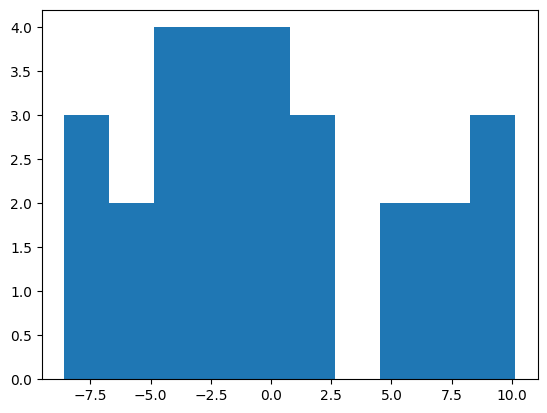

In [10]:
# Histograma de los residuos
plt.hist(model.resid)